# Individual Plan

## Important Data

In [10]:



library(tidyverse)
url1 = "https://drive.google.com/uc?export=download&id=18e7urAy92XEfIq-4JRFg3ZrBtKKYtpVF"
url2 = "https://drive.google.com/uc?export=download&id=1_GtKJIJnVDaDWqZcrtQIz2l-ipIPY1nj"
players <- read_csv(url1)
head(players)
sessions <- read_csv(url2)
head(sessions)



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[Github link]
https://github.com/HouyangZhang/Individual-Plan.git

## Data Description

### For Player

+ `experience`, charactor, describes the experience level of the players, as: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`.
+ `subscribe`, logical, describes whether or not the player has subscribed the game info, as: `TRUE`, and `FALSE`
+ `hashedEmail`, charactor, this records the hashing encoded email addresses of players.
+ `played_hours`, double, records the game playtime in hours, with a range from 0 to 99.
+ `gender`, charactor,The players gender
+ `name`,charactor,the name of players
+ `age`,double — player’s age in years

### For Sessions

+ `hashedEmail`, charactor, this records the hashing encoded email addresses of players.
+ `start_time`, charactor ,The time when the player last started the game
+ `end_time` , charactor，The time when the player last ended the game
+ `original_start_time`,double,The original data of start time ,but it is not readable by human
+ `original_end_time`, double ,The original data of end time ,but it is not readable by human

### Potential issues

In [15]:
players |>
group_by(gender) |>
summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


1. I can't understande the original_start_time and original_end_time from sessions,so these may be useleee
2. The quantities of `Agender`, `Other`, and `Two-Spirited` are very small compared to `Male` and `Female`.

In [16]:
players |> group_by(gender)|>
summarize(max = max(played_hours), min = min(played_hours), avg = mean(played_hours))

gender,max,min,avg
<chr>,<dbl>,<dbl>,<dbl>
Agender,12.5,0.0,6.25000000
Female,178.2,0.0,10.63513514
Male,223.1,0.0,4.12741935
Non-binary,218.1,0.0,14.88000000
Other,0.2,0.2,0.20000000
Prefer not to say,2.0,0.0,0.37272727
Two-Spirited,0.4,0.0,0.08333333


the gender can predict play hours  
Among them, four genders occupy the main distribution Agender,Female,Male,Non-binary

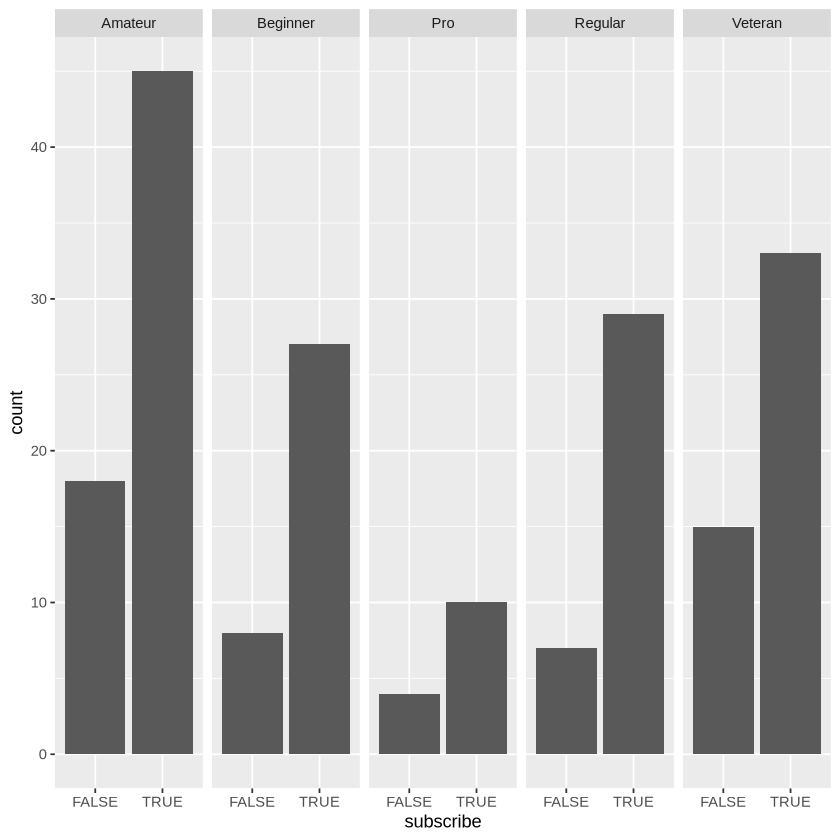

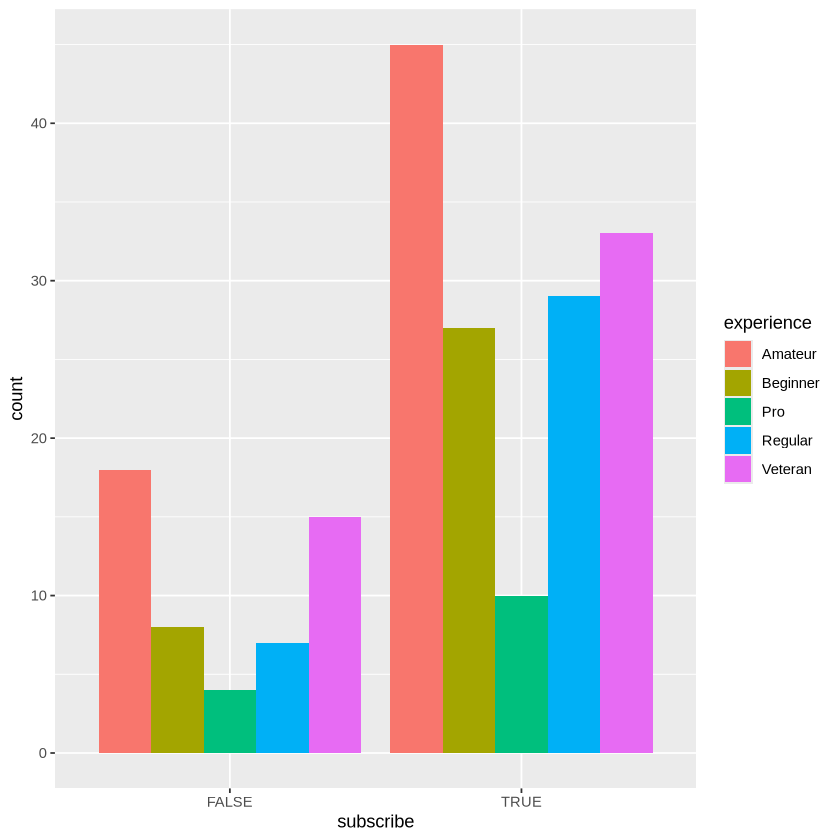

In [25]:
ggplot(players, aes(x=subscribe)) + geom_bar() + facet_grid(cols = vars(experience))
ggplot(players, aes(x=subscribe)) + geom_bar(aes(fill=experience), position="dodge")

+ In the first plot, the data is divided by experience level (Amateur, Beginner, Pro, Regular, Veteran). Each facet shows the number of subscribed and unsubscribed players within that experience group.
→ It reveals that Amateur and Veteran players have higher subscription counts compared to others.

+ In the second plot, all experience levels are displayed together, distinguished by different colors.
→ It shows that most subscribers are Amateur or Veteran, while Pro players are the fewest in both subscription categories.

## Select Question

## Selected Question
I will answer **question 1**: `What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and  how do these features differ between various player types?`  
In particular, I will use `experience`, `played_hours`, and `age` as perdictors to predict `subscribe`.  
This is a **knn classification** problem, as the response varibale `subscribe` is categorical. Also, I need to convert `experience` into numerical before perform classification.  
This plan aims to identify which player traits and behaviours most strongly predict subscription likelihood while maintaining interpretability. Logistic regression provides transparency and strong baseline performance, making it suitable for this stage of the analysis.
